In [60]:
import cv2
import numpy as np
import os
import time
import math
import csv
import matplotlib.pyplot as plt
from IPython.display import display
import psutil

In [61]:
img = cv2.imread('patterns/circle/pat_07/03_c.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB

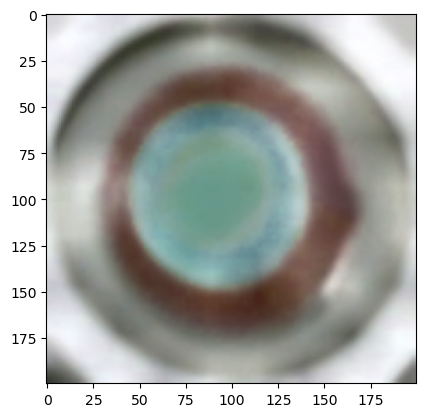

In [62]:
plt.imshow(img_rgb)

In [63]:
def preprocess(img):

    FIXED_SIZE        = (200, 200)
    BILATERAL_PARAMS  = (5, 75, 75)
    NLM_PARAMS        = {"h": 10, "templateWindowSize": 7, "searchWindowSize": 21}
    CLAHE_CLIP        = 2.0
    CLAHE_GRID        = (8, 8)
    
    """Denoise, CLAHE enhance, resize & return processed color + gray."""
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    s = cv2.bilateralFilter(s, *BILATERAL_PARAMS)
    v = cv2.fastNlMeansDenoising(v, None, **NLM_PARAMS)
    den = cv2.cvtColor(cv2.merge([h, s, v]), cv2.COLOR_HSV2BGR)

    lab = cv2.cvtColor(den, cv2.COLOR_BGR2Lab)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=CLAHE_CLIP, tileGridSize=CLAHE_GRID)
    l = clahe.apply(l)
    enhanced = cv2.cvtColor(cv2.merge([l, a, b]), cv2.COLOR_Lab2BGR)

    proc = cv2.resize(enhanced, FIXED_SIZE)
    gray = cv2.cvtColor(proc, cv2.COLOR_BGR2GRAY)
    return proc, gray

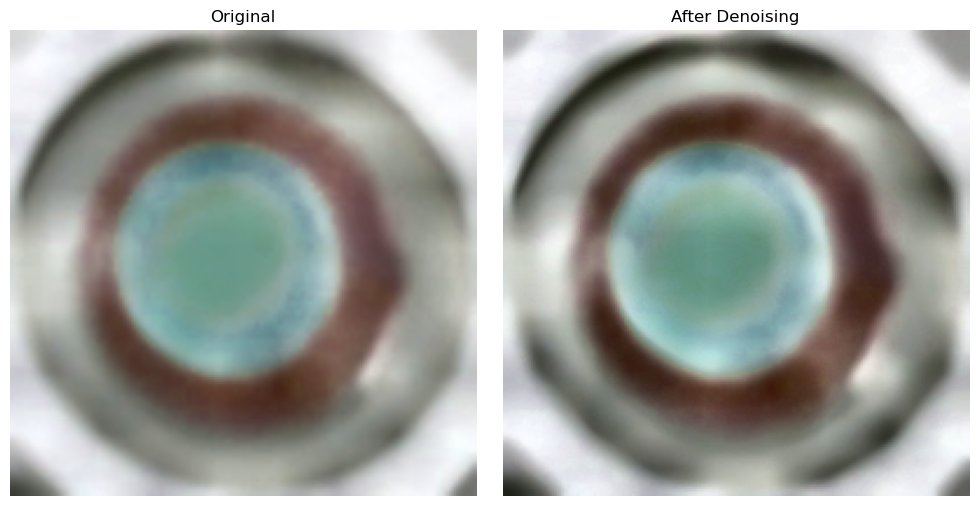

In [64]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(preprocess(img_rgb)[0])
plt.title('After Denoising')
plt.axis('off')

plt.tight_layout()
plt.show()

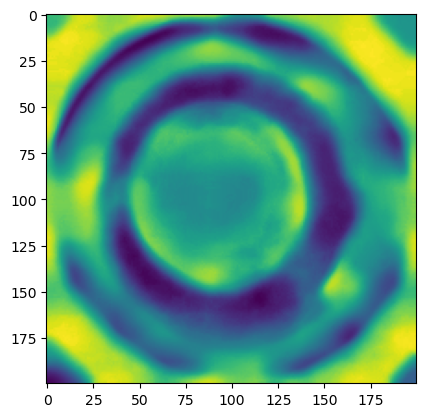

In [65]:
plt.imshow(preprocess(img_rgb)[1])

In [66]:
#!/usr/bin/env python3
import cv2
import numpy as np
import matplotlib.pyplot as plt

BILATERAL_PARAMS  = (5, 75, 75)
NLM_PARAMS        = {"h": 10, "templateWindowSize": 7, "searchWindowSize": 21}
CLAHE_CLIP        = 2.0
CLAHE_GRID        = (8, 8)

# --- Load example image ---
img = cv2.imread('pat.png')
FIXED_SIZE        = (200, 200)
BILATERAL_PARAMS  = (5, 75, 75)
NLM_PARAMS        = {"h": 10, "templateWindowSize": 7, "searchWindowSize": 21}
CLAHE_CLIP        = 2.0
CLAHE_GRID        = (8, 8)

"""Denoise, CLAHE enhance, resize & return processed color + gray."""
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
s = cv2.bilateralFilter(s, *BILATERAL_PARAMS)
v = cv2.fastNlMeansDenoising(v, None, **NLM_PARAMS)
den = cv2.cvtColor(cv2.merge([h, s, v]), cv2.COLOR_HSV2BGR)

lab = cv2.cvtColor(den, cv2.COLOR_BGR2Lab)
l, a, b = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=CLAHE_CLIP, tileGridSize=CLAHE_GRID)
l = clahe.apply(l)
enhanced = cv2.cvtColor(cv2.merge([l, a, b]), cv2.COLOR_Lab2BGR)

denoised_rgb = cv2.resize(enhanced, FIXED_SIZE)
gray = cv2.cvtColor(denoised_rgb, cv2.COLOR_BGR2GRAY)


